In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [57]:
df = pd.read_csv('C:\\Users\\ezbanta\\Desktop\\Learnbay_AI_ML_course\\project session\\Amazon_sales_dataset\\Amazon_Best_Seller_2021_June.csv')

In [58]:
df.head()

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           707 non-null    object 
 1   Category       707 non-null    object 
 2   Product Link   707 non-null    object 
 3   No of Sellers  707 non-null    object 
 4   Rank           707 non-null    object 
 5   Rating         707 non-null    float64
 6   Reviews Count  707 non-null    object 
 7   Price          707 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.3+ KB


In [60]:
df.describe()

,Rating
count,707.000000
mean,4.593494
std,0.284117
min,1.400000
25%,4.500000
50%,4.700000
75%,4.800000
max,5.000000


In [61]:
#Drop columns

In [62]:
df=df.drop(['Product Link'],axis=1)

In [63]:
df=df.drop(['ASIN'],axis=1)

In [64]:
#Convert price to float
df.Price=df.Price.str.lstrip('$')
df.Price=df.Price.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       707 non-null    object 
 1   No of Sellers  707 non-null    object 
 2   Rank           707 non-null    object 
 3   Rating         707 non-null    float64
 4   Reviews Count  707 non-null    object 
 5   Price          707 non-null    float64
dtypes: float64(2), object(4)
memory usage: 33.3+ KB


In [65]:
#Modify No of cellers col
df['No of Sellers'] = df['No of Sellers'].str.rstrip('Sellers')
df['No of Sellers'] = df['No of Sellers'].astype('int64')

In [68]:
#Modify Rank col
df['Rank'] = df['Rank'].str.lstrip('#')
df['Rank'] = df['Rank'].astype('int64')

In [87]:
#modify Category col
dic1 = {'Electronics':0, 'Clothing, Shoes & Jewelry':1, 'Gift Cards':2, 'Books':3,'Video Games':4, 'Camera & Photo':5, 'Toys & Games':6}
df['Category']= df['Category'].map(dic1)

In [88]:
df
df.info()

,Category,No of Sellers,Rank,Rating,Reviews Count,Price
0,0,1,1,4.7,"640,721",39.99
1,0,1,2,4.7,"854,114",34.99
2,0,1,3,4.7,"267,821",44.99
3,0,27,4,4.8,"114,267",28.48
4,0,1,5,4.7,"267,821",49.99
...,...,...,...,...,...,...
702,6,10,95,4.6,"8,795",6.99
703,6,5,96,4.7,649,16.99
704,6,1,97,4.8,"9,121",8.99
705,6,26,98,4.7,"18,449",19.99


In [74]:
###############Univariate Analysis###################
df['Rating'].value_counts()

4.8    167
4.7    130
4.6    104
4.4     74
4.5     71
4.9     58
4.3     40
4.2     22
4.1     12
4.0     10
5.0      6
3.3      3
3.8      3
3.9      2
3.6      1
3.4      1
1.4      1
3.5      1
2.7      1
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating'>

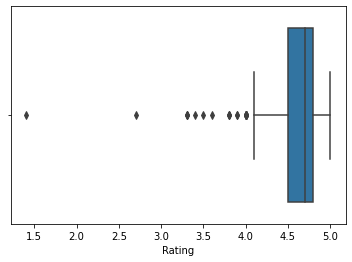

In [76]:
sns.boxplot(x=df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Count'>

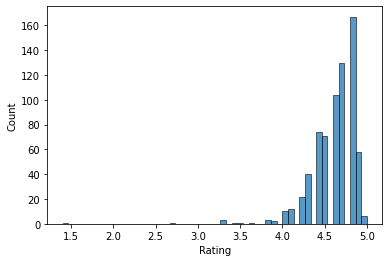

In [77]:
sns.histplot(x=df['Rating'])

In [ ]:
#Higher ratings are more frequent as shown in the dataset

In [78]:
df['No of Sellers'].value_counts()

1     382
2      66
4      35
3      32
5      28
     ... 
24      1
26      1
45      1
43      1
33      1
Name: No of Sellers, Length: 61, dtype: int64

<AxesSubplot:xlabel='No of Sellers'>

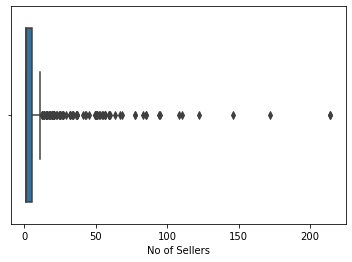

In [79]:
sns.boxplot(x=df['No of Sellers'])

<AxesSubplot:xlabel='No of Sellers', ylabel='Count'>

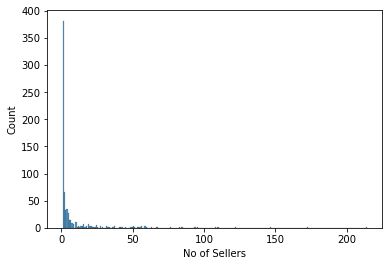

In [80]:
sns.histplot(x=df['No of Sellers'])

In [ ]:
#only one seller is showing max num of count in the dataset

In [81]:
df['Price'].value_counts()

50.00     62
25.00     26
29.99     20
19.99     16
39.99     15
          ..
7.40       1
119.76     1
123.56     1
299.99     1
12.29      1
Name: Price, Length: 287, dtype: int64

<AxesSubplot:xlabel='Price'>

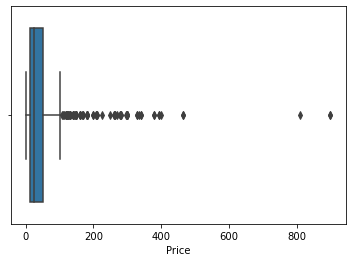

In [82]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

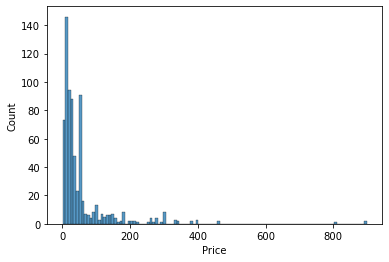

In [83]:
sns.histplot(x=df['Price'])

In [ ]:
#lower price products are frequent in the dataset

In [84]:
df['Category'].value_counts()

Electronics                  147
Gift Cards                   100
Camera & Photo               100
Clothing, Shoes & Jewelry    100
Video Games                   95
Toys & Games                  95
Books                         70
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Count'>

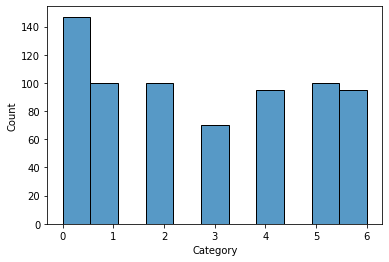

In [89]:
sns.histplot(x=df['Category'])

In [ ]:
#As shown, Electronics products have more num of selling count in the dataset, overall dataset is balanced in case of Category

In [ ]:
############3Bivariate Analysis##############

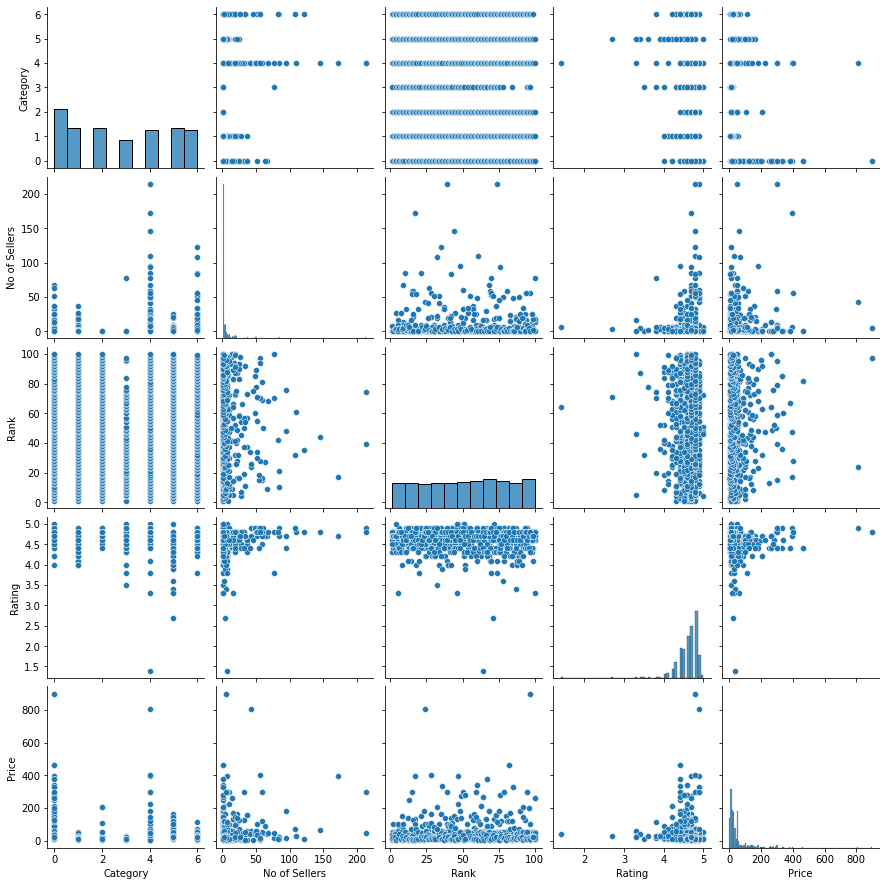

In [90]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Price', ylabel='Rank'>

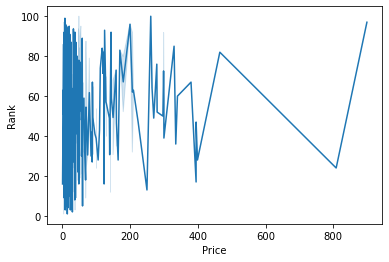

In [94]:
from numpy import mean
sns.lineplot(x='Price', y='Rank',data=df, estimator=mean )

<AxesSubplot:xlabel='No of Sellers', ylabel='Rank'>

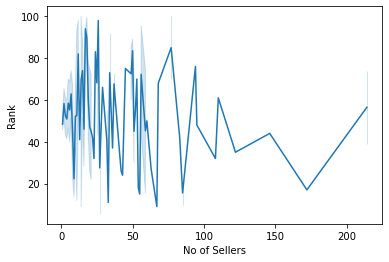

In [97]:
sns.lineplot(x='No of Sellers', y='Rank',data=df, estimator=mean )

<AxesSubplot:xlabel='Rating', ylabel='Rank'>

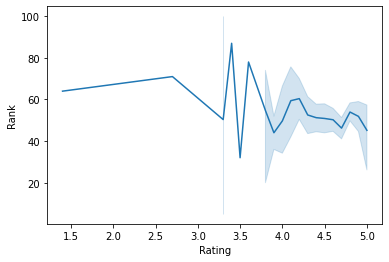

In [98]:
sns.lineplot(x='Rating', y='Rank',data=df, estimator=mean )

<AxesSubplot:xlabel='Reviews Count', ylabel='Rank'>

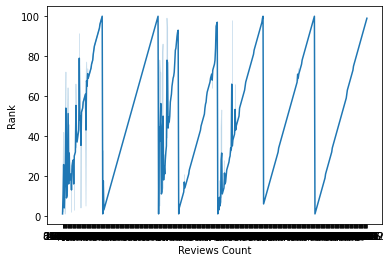

In [101]:
sns.lineplot(x='Reviews Count', y='Rank',data=df, estimator=mean )

<AxesSubplot:xlabel='Category', ylabel='Rank'>

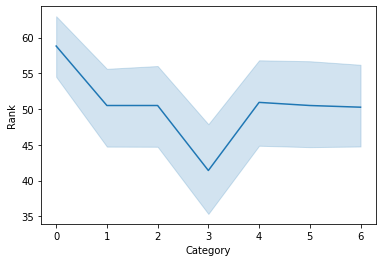

In [102]:
sns.lineplot(x='Category', y='Rank',data=df, estimator=mean )

<AxesSubplot:xlabel='No of Sellers', ylabel='Price'>

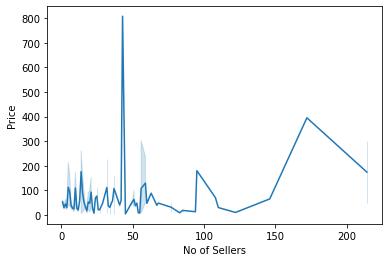

In [103]:
sns.lineplot(x='No of Sellers', y='Price',data=df, estimator=mean )

<AxesSubplot:xlabel='Category', ylabel='Price'>

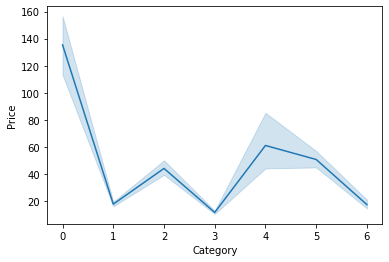

In [105]:
sns.lineplot(x='Category', y='Price',data=df, estimator=mean )

In [ ]:
 ##########Multivariate Analysis#############

<AxesSubplot:>

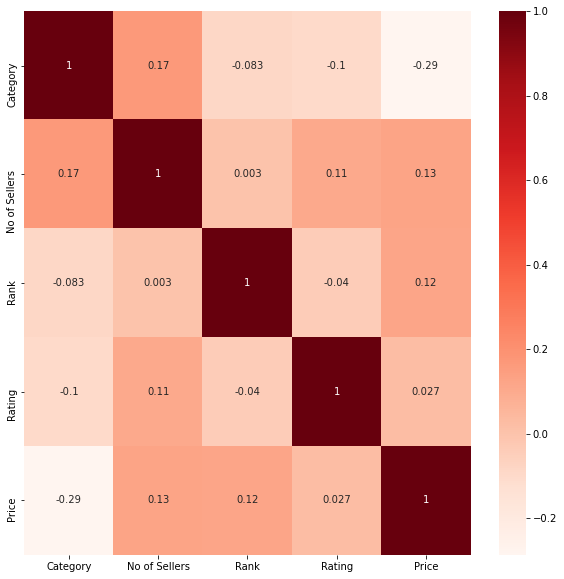

In [110]:
plt.figure(figsize=(10,10))
c= df.corr()
sns.heatmap(c,cmap='Reds',annot=True)